In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary Libraries
import os
import re
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
import lightgbm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import set_config

In [3]:
data_loc = r"C:/Users/manoj/OneDrive/Desktop/Inno Machine learning/Project data/ML final Project/laptop_details.csv"

In [4]:
lap_data = pd.read_csv(data_loc)

In [5]:
lap_data

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [6]:
lap_data.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [7]:
lap_data.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [8]:
np.round(lap_data.isna().sum() / lap_data.shape[0]*100,2)

Product     0.00
Rating     19.31
MRP         0.00
Feature     0.00
dtype: float64

In [9]:
data = pd.DataFrame({})
data

""


In [10]:
lap_data['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [11]:
lap_data['Feature'][15]

'AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMWindows 11 Operating System1 TB SSD39.62 cm (15.6 inch) DisplayMicrosoft Office Home & Student1 Year Onsite Warranty'

### Brand column extracting

In [12]:
reg1 = r'^(\w+)'
data['Brand'] = lap_data['Product'].apply(lambda x:(re.findall(reg1, x)[0]))

In [13]:
data['Brand'].value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

In [14]:
data['Brand'][20]

'APPLE'

In [15]:
data.head()

,Brand
0,Lenovo
1,Lenovo
2,ASUS
3,HP
4,ASUS


### Laptop Precessor gen extracting

In [16]:
reg2 = r'(Intel Core i\d+|AMD \w+ \d+ \w+ Core Processor|Apple M1 \w+ Processor)'

In [17]:
data['Processor'] = lap_data['Feature'].apply(lambda x:(re.findall(reg2, x)))

In [18]:
processor = []
for i in data['Processor']:
    if len(i)>0:
        processor.append(i[0])
    else:
        processor.append(np.nan)
print(len(processor))
data['Processor'] = processor

720


In [19]:
data['Processor'].value_counts()

Intel Core i5                      159
Intel Core i3                      135
AMD Ryzen 9 Octa Core Processor     87
AMD Ryzen 7 Octa Core Processor     80
Intel Core i7                       56
AMD Ryzen 5 Hexa Core Processor     52
AMD Ryzen 3 Dual Core Processor     43
AMD Ryzen 5 Quad Core Processor     37
Intel Core i9                       11
Apple M1 Pro Processor               6
AMD Ryzen 3 Quad Core Processor      4
AMD Ryzen 5 Dual Core Processor      2
AMD Ryzen 7 Quad Core Processor      1
Apple M1 Max Processor               1
AMD Ryzen 3 Hexa Core Processor      1
Name: Processor, dtype: int64

In [20]:
data.head()

,Brand,Processor
0,Lenovo,Intel Core i3
1,Lenovo,Intel Core i3
2,ASUS,Intel Core i3
3,HP,AMD Ryzen 5 Hexa Core Processor
4,ASUS,Intel Core i5


### Extracting the RAM

In [21]:
reg4 = r'\d+\sGB[\s\w]'
data['RAM'] = lap_data['Feature'].apply(lambda x:(re.findall(reg4, x)[0]))

In [22]:
reg8 = r'(DDR5|LPDDR4|DDR4|Unified Memory) RAM'
data['RAM type'] = lap_data['Feature'].apply(lambda x:(re.findall(reg8, x)))

In [23]:
ram = []
for i in data['RAM']:
    ram.append(i.replace('RAM',''))
    
data['RAM'] = ram

In [24]:
data['RAM'].value_counts()

8 GB       401
16 GB      263
4 GB        37
32 GB       17
128 GB       2
Name: RAM, dtype: int64

In [25]:
data['RAM'].unique()

array(['8 GB ', '16 GB ', '4 GB ', '32 GB ', '128 GB '], dtype=object)

#### Ram Type

In [26]:
ram_ty = []
for i in data['RAM type']:
    if len(i) > 0:
        ram_ty.append(i[0])
    else:
        ram_ty.append(np.nan)
data['RAM type'] = ram_ty

In [27]:
data['RAM type'].value_counts()

DDR4              561
DDR5              101
Unified Memory     12
LPDDR4              8
Name: RAM type, dtype: int64

### Extracting the Storage

In [28]:
reg5 = '(\d+ GB SSD|\d+ TB SSD|\d+ GB HDD|\d+ TB HDD )'
data['Storage'] = lap_data['Feature'].apply(lambda x:(re.findall(reg5, x)))

In [29]:
sto_1 = []
for i in data['Storage']:
    if len(i) > 0:
        sto_1.append(i[0])
    else:
        sto_1.append(np.nan)
print(len(sto_1))
data['Storage'] = sto_1

720


In [30]:
data['Storage'].value_counts()

512 GB SSD    377
1 TB SSD      176
256 GB SSD    124
128 GB SSD      8
2 TB SSD        7
256 GB HDD      1
Name: Storage, dtype: int64

In [31]:
data.head()

,Brand,Processor,RAM,RAM type,Storage
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD


In [32]:
# data = data.drop(data[data['Storage'] == 'Storage_2 TB SSD'].index)


### Extracting the display

In [33]:
reg6 = r'(\d+.?\d+)\sinch'
data['Display(inch)'] = lap_data['Feature'].apply(lambda x:(re.findall(reg6, x)))


In [34]:
dis_1 = []
for i in data['Display(inch)']:
    if len(i)>0:
        dis_1.append(i[0])
    else:
        dis_1.append(np.nan)
data['Display(inch)'] = dis_1


In [35]:
data

,Brand,Processor,RAM,RAM type,Storage,Display(inch)
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6
...,...,...,...,...,...,...
715,ASUS,NaN,4 GB,LPDDR4,NaN,11.6
716,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB,DDR4,512 GB SSD,15.6
717,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB,DDR5,1 TB SSD,15.6
718,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14


In [36]:
lap_data['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [37]:
reg_dis = r'Touch'
data['Display_type'] = lap_data['Feature'].apply(lambda x:(re.findall(reg_dis , x)))

In [38]:
dis_type = []
for i in data['Display_type']:
    if len(i) > 0:
        dis_type.append(i[0])
    else:
        dis_type.append('No-Touch')
        
data['Display_type'] = dis_type

In [39]:
data.head(5)

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14,No-Touch
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch


In [40]:
data['Display_type'].value_counts()

No-Touch    680
Touch        40
Name: Display_type, dtype: int64

### Operating System

In [41]:
re_os = r'Windows\s+\d+|Mac\s+'
data['Operating_system'] = lap_data['Feature'].apply(lambda x:(re.findall(re_os,x)))

In [42]:
lap_data['Feature'][20]

'Apple M1 Processor8 GB DDR4 RAMMac OS Operating System256 GB SSD33.78 cm (13.3 inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warra\xadnty'

In [43]:
lap_data['Feature'][21]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 inch) DisplayMicrosoft Office Home & Student 20211 Year Onsite Warranty'

In [44]:
os_r = r'Windows\s+\d+|Mac\s+'
re.findall(os_r , lap_data['Feature'][20])


['Mac ']

In [45]:
re.findall(os_r , lap_data['Feature'][21])[0]

'Windows 11'

In [46]:
oprating_append = []
for i in data['Operating_system']:
    if len(i) > 0 :
        oprating_append.append(i[0])
    else:
        oprating_append.append(np.nan)

In [47]:
data['Operating_system'] = oprating_append

In [48]:
data['Operating_system'].value_counts()

Windows 11    564
Windows 10    126
Mac            19
Name: Operating_system, dtype: int64

In [49]:
data.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14,No-Touch,Windows 11
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11


### Extracting the warranty

In [50]:
war_li = []
reg_war = r'(\d)\sYear'
data['Warranty'] = lap_data['Feature'].apply(lambda x : (re.findall(reg_war ,x)))

In [51]:

warranty = []
for j in data['Warranty']:
    if len(j)>0:
        warranty.append(j[0])
    else:
        warranty.append(np.nan)
data['Warranty'] = warranty

In [52]:
data

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14,No-Touch,Windows 11,2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1
...,...,...,...,...,...,...,...,...,...
715,ASUS,NaN,4 GB,LPDDR4,NaN,11.6,Touch,NaN,1
716,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1
717,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB,DDR5,1 TB SSD,15.6,No-Touch,Windows 11,1
718,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14,Touch,Windows 11,1


## MRP data

In [53]:
data['Price'] = lap_data['MRP']

## Rating

In [54]:
data['Rating'] = lap_data['Rating']

In [55]:
data.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14,No-Touch,Windows 11,2,"₹36,990",4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,"₹39,990",4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,"₹32,990",4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,"₹49,990",4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,"₹49,990",4.4


## Data Cleaning

In [56]:
price = []
for i in data['Price']:
    price.append(i.replace('₹',''))
    
print(len(price))

720


In [57]:
data['Price'] = price

In [58]:
price = []
for i in data['Price']:
    price.append(i.replace(',',''))
    
print(len(price))

720


In [59]:
data['Price'] = price

In [60]:
data.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4


### Checking Null values

In [61]:
data.isnull().sum()

Brand                 0
Processor            45
RAM                   0
RAM type             38
Storage              27
Display(inch)       210
Display_type          0
Operating_system     11
Warranty             13
Price                 0
Rating              139
dtype: int64

In [62]:
np.round(data.isna().sum() / data.shape[0]*100,2)

Brand                0.00
Processor            6.25
RAM                  0.00
RAM type             5.28
Storage              3.75
Display(inch)       29.17
Display_type         0.00
Operating_system     1.53
Warranty             1.81
Price                0.00
Rating              19.31
dtype: float64

In [63]:
# data = data.dropna()

In [64]:
data['Processor'].fillna(data['Processor'].mode()[0] , inplace = True)

In [65]:
data['Storage'].fillna(data['Storage'].mode()[0],inplace = True)

In [66]:
data['Display(inch)'].fillna(data['Display(inch)'].mode()[0],inplace = True)

In [67]:
data['Operating_system'].fillna(data['Operating_system'].mode()[0] , inplace = True)

In [68]:
data['Warranty'].fillna(data['Warranty'].mode()[0] , inplace = True)

In [69]:
data['RAM type'].fillna(data['RAM type'].mode()[0] , inplace = True)

In [70]:
data['Rating'].mean()

4.321170395869185

In [71]:
data['Rating'].fillna(data['Rating'].mean() , inplace = True)

In [72]:
data.isna().sum()

Brand               0
Processor           0
RAM                 0
RAM type            0
Storage             0
Display(inch)       0
Display_type        0
Operating_system    0
Warranty            0
Price               0
Rating              0
dtype: int64

In [73]:
data.shape

(720, 11)

### Changing the dtypes

In [74]:
data.dtypes

Brand                object
Processor            object
RAM                  object
RAM type             object
Storage              object
Display(inch)        object
Display_type         object
Operating_system     object
Warranty             object
Price                object
Rating              float64
dtype: object

In [75]:
data['Display(inch)'] = data['Display(inch)'].astype('float')

In [76]:
data['Warranty'] = data['Warranty'].astype('int')

In [77]:
data['Price'] = data['Price'].astype('int')

In [78]:
data.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4


In [79]:
data.dtypes

Brand                object
Processor            object
RAM                  object
RAM type             object
Storage              object
Display(inch)       float64
Display_type         object
Operating_system     object
Warranty              int32
Price                 int32
Rating              float64
dtype: object

### Checking dublicates

In [80]:
data.duplicated().value_counts()

False    414
True     306
dtype: int64

In [81]:
data.drop_duplicates(inplace = True) # Droping the dublicated values

In [82]:
data.shape

(414, 11)

In [83]:
data

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.20000
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.20000
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.30000
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.40000
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.40000
...,...,...,...,...,...,...,...,...,...,...,...
713,DELL,Intel Core i5,16 GB,DDR5,512 GB SSD,15.6,No-Touch,Windows 11,1,76590,4.32117
714,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.60000
715,ASUS,Intel Core i5,4 GB,LPDDR4,512 GB SSD,11.6,Touch,Windows 11,1,23490,4.00000
718,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.00000


In [84]:
data.shape

(414, 11)

In [85]:
data.to_csv('Final_laptop_data.csv')

In [86]:
df = pd.read_csv('Final_laptop_data.csv')
df.head()

,Unnamed: 0,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4


In [87]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [88]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.20000
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.20000
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.30000
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.40000
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.40000
...,...,...,...,...,...,...,...,...,...,...,...
409,DELL,Intel Core i5,16 GB,DDR5,512 GB SSD,15.6,No-Touch,Windows 11,1,76590,4.32117
410,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.60000
411,ASUS,Intel Core i5,4 GB,LPDDR4,512 GB SSD,11.6,Touch,Windows 11,1,23490,4.00000
412,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.00000


## Exploratory Data Analysis

In [89]:
df.info

<bound method DataFrame.info of       Brand                        Processor     RAM RAM type     Storage  \
0    Lenovo                    Intel Core i3   8 GB      DDR4  256 GB SSD   
1    Lenovo                    Intel Core i3   8 GB      DDR4  512 GB SSD   
2      ASUS                    Intel Core i3   8 GB      DDR4  512 GB SSD   
3        HP  AMD Ryzen 5 Hexa Core Processor   8 GB      DDR4  512 GB SSD   
4      ASUS                    Intel Core i5   8 GB      DDR4  512 GB SSD   
..      ...                              ...     ...      ...         ...   
409    DELL                    Intel Core i5  16 GB      DDR5  512 GB SSD   
410      HP  AMD Ryzen 7 Octa Core Processor  16 GB      DDR4  512 GB SSD   
411    ASUS                    Intel Core i5   4 GB    LPDDR4  512 GB SSD   
412    ASUS                    Intel Core i7  16 GB      DDR5  512 GB SSD   
413  Lenovo                    Intel Core i5   8 GB      DDR4  256 GB SSD   

     Display(inch) Display_type Operating_s

In [90]:
df.describe()

,Display(inch),Warranty,Price,Rating
count,414.000000,414.00000,414.000000,414.000000
mean,512.846860,1.13285,80752.799517,4.313423
std,10124.364324,0.39271,61879.384424,0.267726
min,11.600000,1.00000,14990.000000,3.000000
25%,15.600000,1.00000,41672.500000,4.200000
50%,15.600000,1.00000,61493.500000,4.321170
75%,15.600000,1.00000,94990.000000,4.400000
max,206015.600000,3.00000,434830.000000,5.000000


In [91]:
df.columns

Index(['Brand', 'Processor', 'RAM', 'RAM type', 'Storage', 'Display(inch)',
       'Display_type', 'Operating_system', 'Warranty', 'Price', 'Rating'],
      dtype='object')

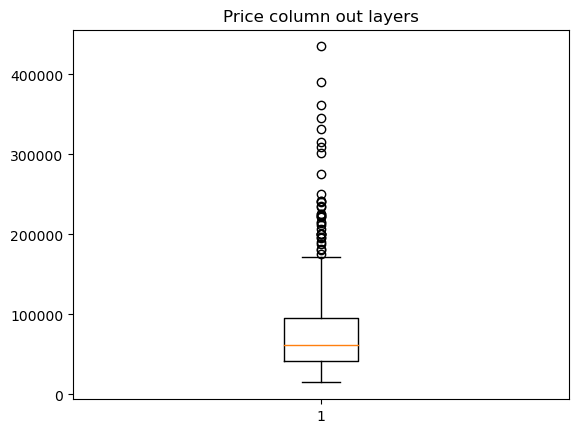

In [92]:
plt.boxplot(df['Price'])
plt.title('Price column out layers')
plt.show()

In [93]:
df['Price'].describe()

count       414.000000
mean      80752.799517
std       61879.384424
min       14990.000000
25%       41672.500000
50%       61493.500000
75%       94990.000000
max      434830.000000
Name: Price, dtype: float64

In [94]:
df.dtypes

Brand                object
Processor            object
RAM                  object
RAM type             object
Storage              object
Display(inch)       float64
Display_type         object
Operating_system     object
Warranty              int64
Price                 int64
Rating              float64
dtype: object

In [95]:
num_att = df.select_dtypes(['int','float'])
num_att.columns

Index(['Display(inch)', 'Warranty', 'Price', 'Rating'], dtype='object')

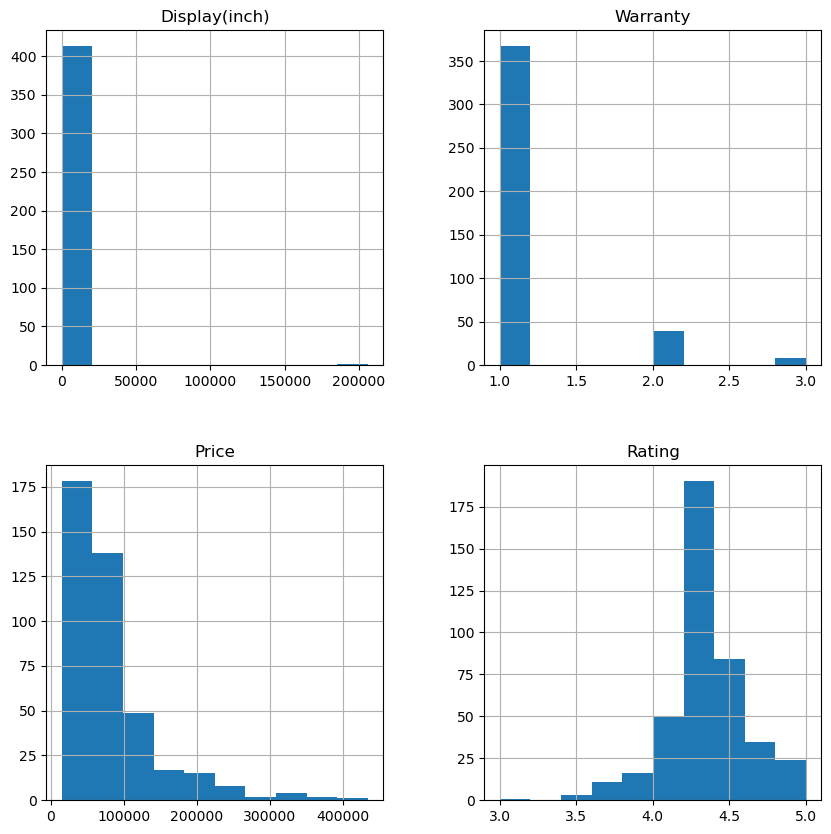

In [96]:
num_att.hist(figsize=(10,10))
plt.show()

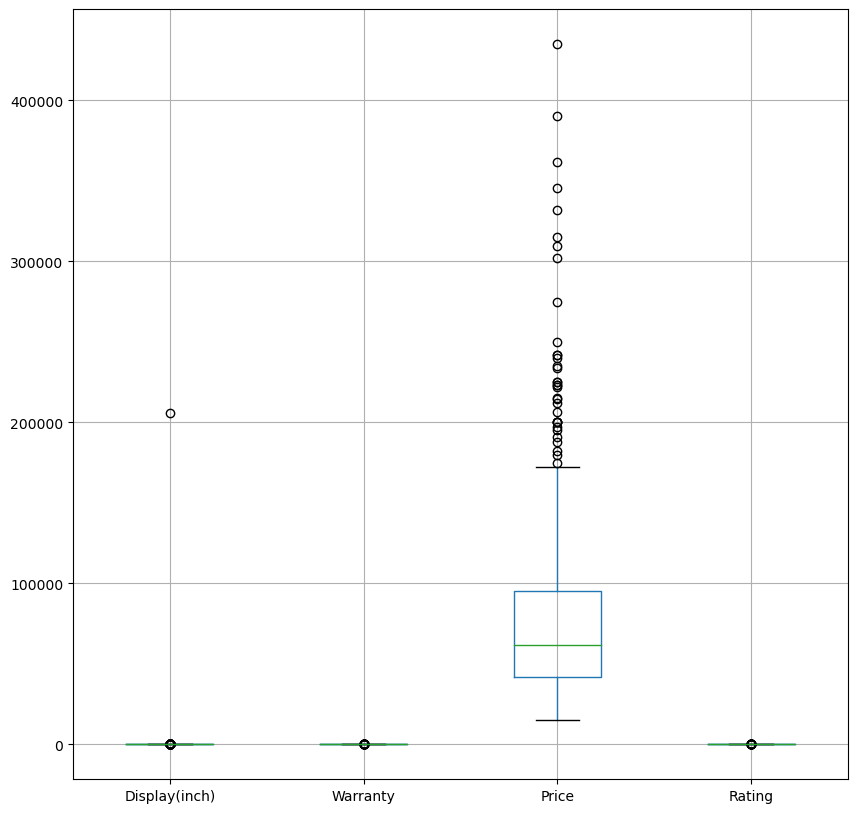

In [97]:
num_att.boxplot(figsize=(10,10))
plt.show()

In [510]:
df['Brand'].value_counts()

ASUS         133
Lenovo        61
HP            57
DELL          56
acer          34
MSI           29
APPLE         15
Infinix       14
realme         3
ALIENWARE      3
RedmiBook      2
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64

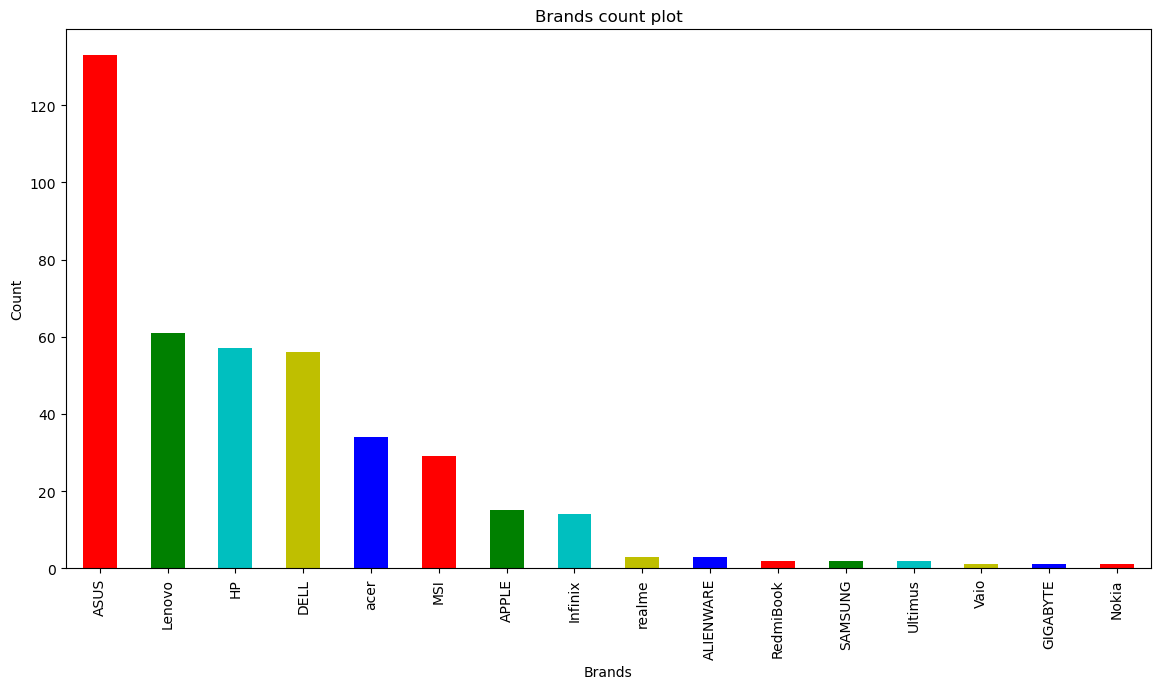

In [511]:
plt.figure(figsize=(14,7))
df['Brand'].value_counts().plot(kind = 'bar',color = ['r','g','c','y','b'])
plt.title('Brands count plot')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.show()


In [512]:
df['RAM'].value_counts()

8 GB       218
16 GB      146
4 GB        32
32 GB       16
128 GB       2
Name: RAM, dtype: int64

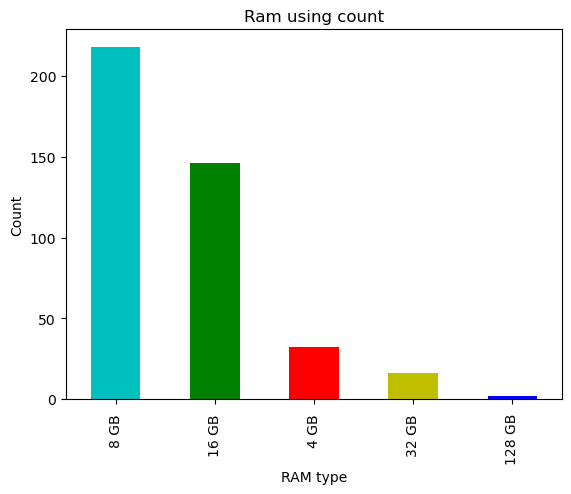

In [513]:

df['RAM'].value_counts().plot(kind = 'bar',color = ['c','g','r','y','b'])
plt.title('Ram using count')
plt.ylabel('Count')
plt.xlabel('RAM type')
plt.show()

In [514]:
df['RAM type'].value_counts()

DDR4              347
DDR5               50
Unified Memory      9
LPDDR4              8
Name: RAM type, dtype: int64

Percentage laptops for each RAM type:
DDR4              347
DDR5               50
Unified Memory      9
LPDDR4              8
Name: RAM type, dtype: int64


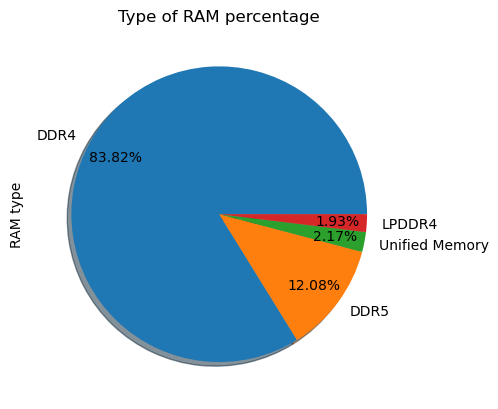

In [515]:
# Count of laptops for each RAM type
ram_type_counts = df['RAM type'].value_counts()
print("Percentage laptops for each RAM type:")
print(ram_type_counts)

df['RAM type'].value_counts().plot(kind = 'pie',autopct = '%0.2F%%',shadow = True,pctdistance=0.8)
plt.title('Type of RAM percentage')
plt.show()




Count of Processor for each type:
Intel Core i5                      149
Intel Core i3                       70
Intel Core i7                       53
AMD Ryzen 5 Hexa Core Processor     41
AMD Ryzen 7 Octa Core Processor     38
AMD Ryzen 3 Dual Core Processor     17
AMD Ryzen 9 Octa Core Processor     15
Intel Core i9                       11
AMD Ryzen 5 Quad Core Processor      8
Apple M1 Pro Processor               4
AMD Ryzen 3 Quad Core Processor      3
AMD Ryzen 5 Dual Core Processor      2
AMD Ryzen 7 Quad Core Processor      1
Apple M1 Max Processor               1
AMD Ryzen 3 Hexa Core Processor      1
Name: Processor, dtype: int64


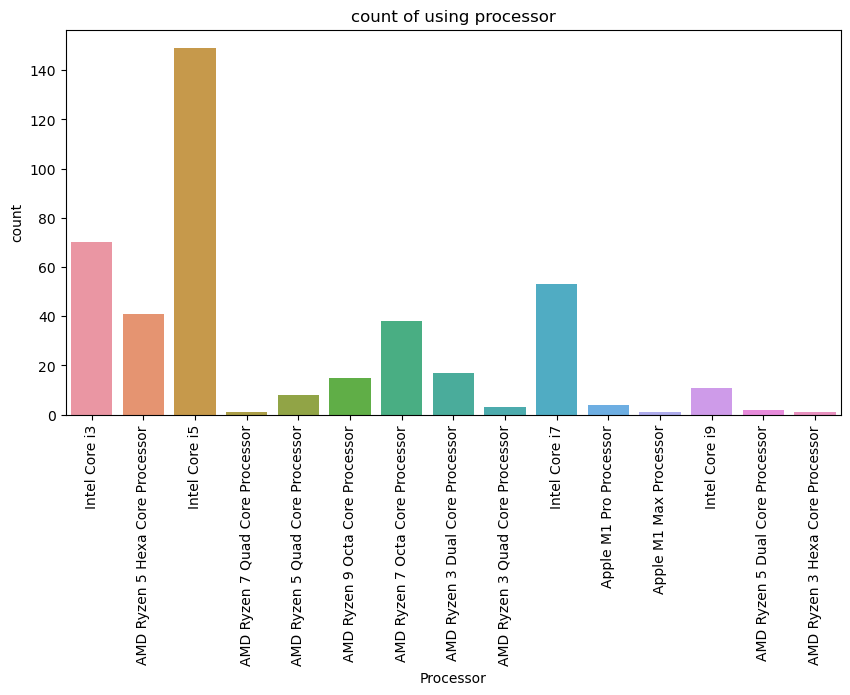

In [516]:
processor_counts = df['Processor'].value_counts()
print("Count of Processor for each type:")
print(processor_counts)

plt.figure(figsize=(10,5))
sns.countplot(df['Processor'])
plt.title('count of using processor')
plt.xticks(rotation = 90)
plt.show()



In [517]:
df['Processor'].value_counts()

Intel Core i5                      149
Intel Core i3                       70
Intel Core i7                       53
AMD Ryzen 5 Hexa Core Processor     41
AMD Ryzen 7 Octa Core Processor     38
AMD Ryzen 3 Dual Core Processor     17
AMD Ryzen 9 Octa Core Processor     15
Intel Core i9                       11
AMD Ryzen 5 Quad Core Processor      8
Apple M1 Pro Processor               4
AMD Ryzen 3 Quad Core Processor      3
AMD Ryzen 5 Dual Core Processor      2
AMD Ryzen 7 Quad Core Processor      1
Apple M1 Max Processor               1
AMD Ryzen 3 Hexa Core Processor      1
Name: Processor, dtype: int64

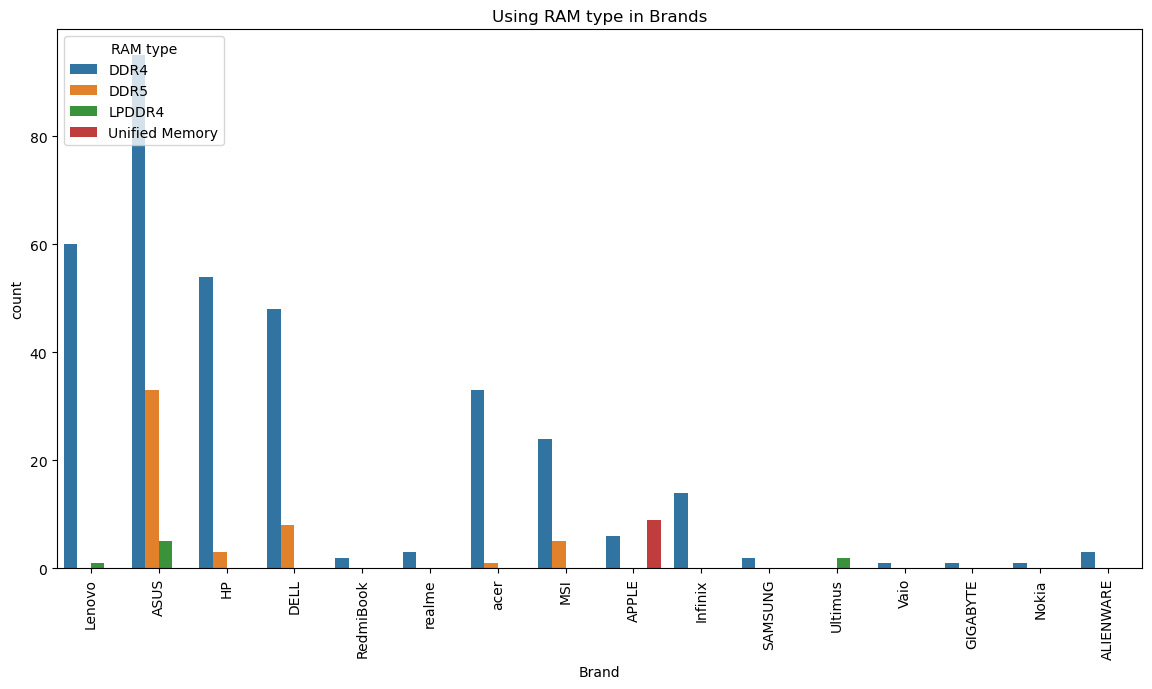

In [518]:
plt.figure(figsize=(14,7))
sns.countplot(df['Brand'] , hue=df['RAM type'])
plt.xticks(rotation = 90)
plt.title('Using RAM type in Brands')
plt.show()

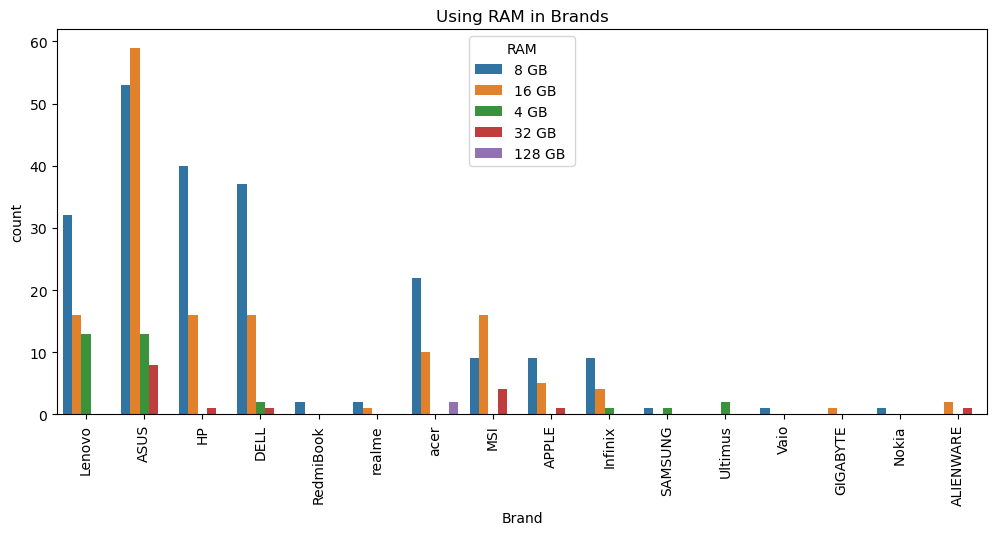

In [519]:
plt.figure(figsize=(12,5),edgecolor='k')
sns.countplot(df['Brand'] , hue=df['RAM'])
plt.xticks(rotation = 90)
plt.title('Using RAM in Brands')
plt.show()

count values of storage : 512 GB SSD    243
256 GB SSD     86
1 TB SSD       72
128 GB SSD      6
2 TB SSD        6
256 GB HDD      1
Name: Storage, dtype: int64


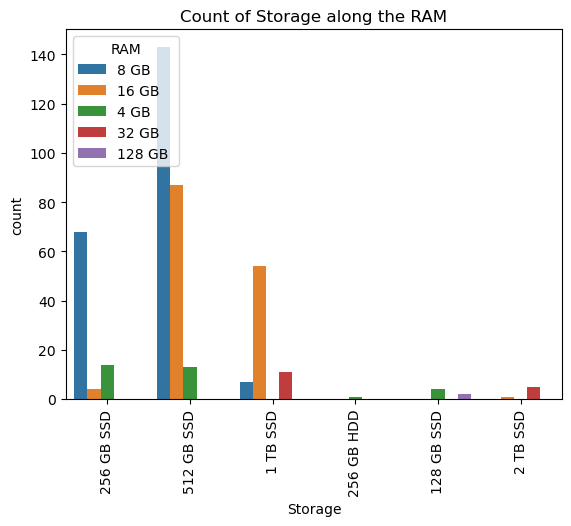

In [520]:
df_storage_count = df['Storage'].value_counts()
print('count values of storage :',df_storage_count)

sns.countplot(df['Storage'] , hue = df['RAM'])
plt.xticks(rotation = 90)
plt.title('Count of Storage along the RAM')
plt.show()

Count of laptops for each warranty type:
1    367
2     39
3      8
Name: Warranty, dtype: int64


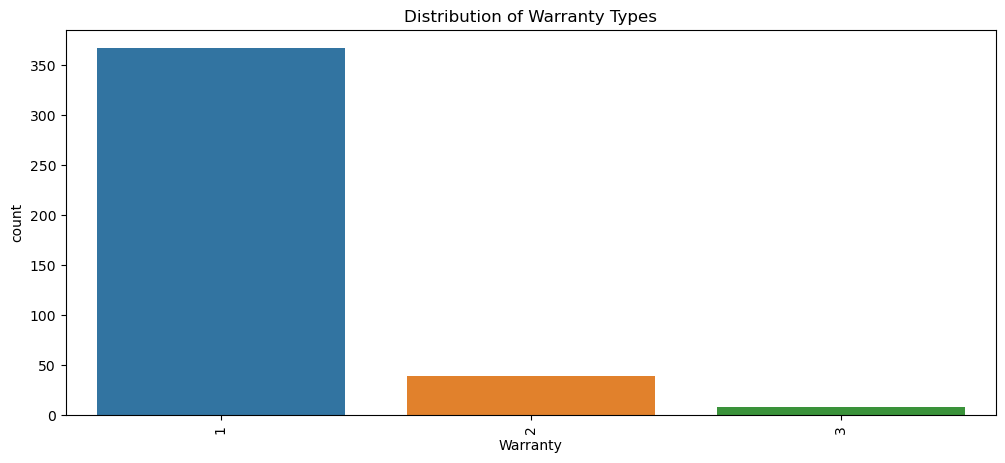

In [521]:
# Count of laptops for each warranty type
warranty_counts = df['Warranty'].value_counts()
print("Count of laptops for each warranty type:")
print(warranty_counts)


# Distribution of Warranty types
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Warranty', order=df['Warranty'].value_counts().index)
plt.title('Distribution of Warranty Types')
plt.xticks(rotation=90)
plt.show()



In [522]:
# warranty_mode = df['Warranty'].mode()[0]
# warranty_mode

In [523]:
# df['Warranty'] = df['Warranty'].replace(warranty_replace, warranty_mode)

In [524]:
df['Warranty'].value_counts()

1    367
2     39
3      8
Name: Warranty, dtype: int64

Count of laptops for each storage size:
512 GB SSD    243
256 GB SSD     86
1 TB SSD       72
128 GB SSD      6
2 TB SSD        6
256 GB HDD      1
Name: Storage, dtype: int64


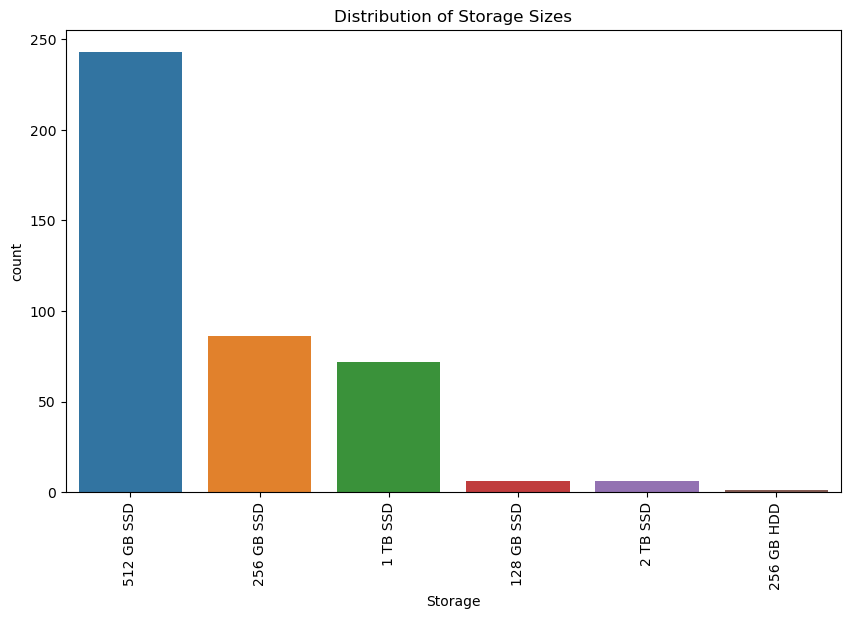

In [525]:
# Count of laptops for each storage size
storage_counts = df['Storage'].value_counts()
print("Count of laptops for each storage size:")
print(storage_counts)


# Distribution of Storage sizes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Storage', order=df['Storage'].value_counts().index)
plt.title('Distribution of Storage Sizes')
plt.xticks(rotation=90)
plt.show()



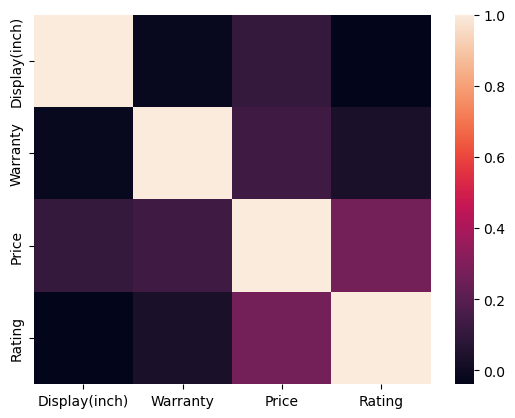

In [526]:
sns.heatmap(df.corr())
plt.show()

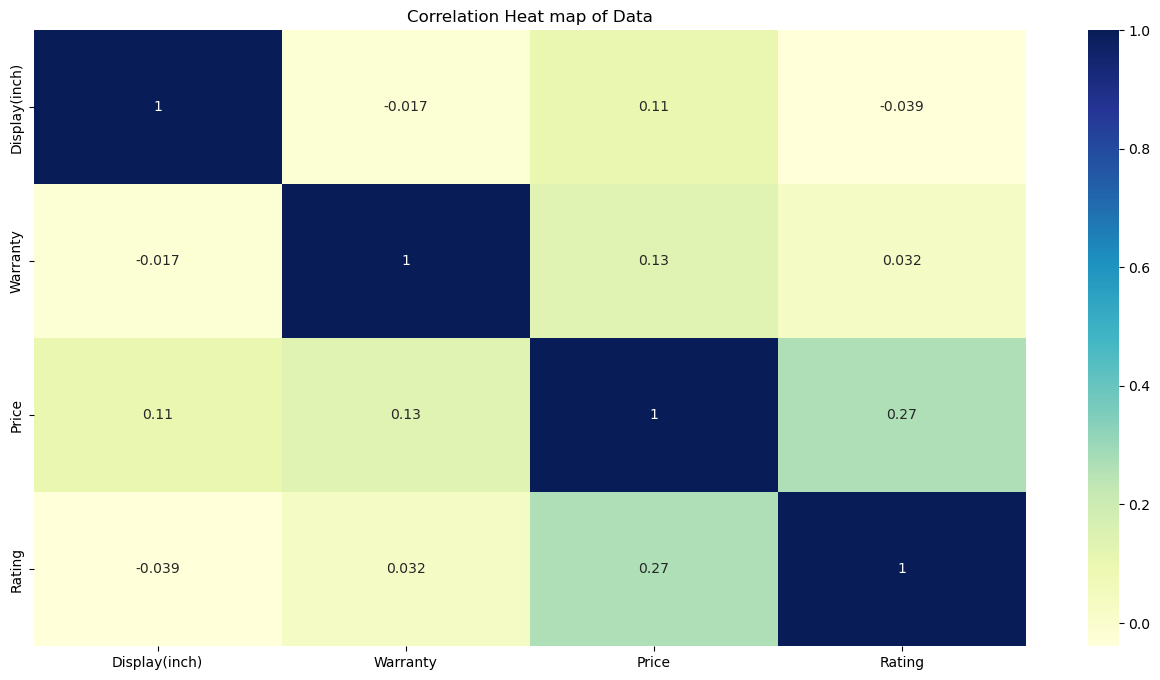

In [527]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heat map of Data')
plt.show()

In [528]:
# stge = df['Storage'].mode()[0]

In [529]:
# df['Storage']=df['Storage'].replace('256 GB HDD' , stge)

In [530]:
# df['Storage'].value_counts()

In [533]:
# Brand
df = df.drop(df[df['Brand'] == 'Vaio'].index)
df = df.drop(df[df['Brand'] == 'GIGABYTE'].index)
df = df.drop(df[df['Brand'] == 'Nokia'].index)
df = df.drop(df[df['Brand'] == 'ALIENWARE'].index)
df = df.drop(df[df['Brand'] == 'SAMSUNG'].index)
df = df.drop(df[df['Brand'] == 'Ultimus'].index)


In [534]:
df['Brand'].value_counts()

ASUS         133
Lenovo        59
HP            57
DELL          55
acer          34
MSI           29
APPLE         15
Infinix       14
realme         3
RedmiBook      2
Name: Brand, dtype: int64

In [532]:
# processor
data = data.drop(data[data['Processor'] == 'AMD Ryzen 7 Quad Core Processor'].index)
data = data.drop(data[data['Processor'] == 'Apple M1 Max Processor'].index)
data = data.drop(data[data['Processor'] == 'AMD Ryzen 3 Hexa Core Processor'].index)
data = data.drop(data[data['Processor'] == 'AMD Ryzen 3 Quad Core Processor'].index)
data = data.drop(data[data['Processor'] == 'AMD Ryzen 5 Dual Core Processor'].index)
data = data.drop(data[data['Processor'] == 'Apple M1 Pro Processor'].index)
data = data.drop(data[data['Processor'] == 'AMD Ryzen 5 Quad Core Processor'].index)

In [330]:
# RAM
data = data.drop(data[data['RAM'] == '128 GB '].index)
data = data.drop(data[data['RAM'] == '4 GB '].index)

In [331]:
# RAM TYPE
data = data.drop(data[data['RAM type'] == 'LPDDR4'].index)
# data = data.drop(data[data['RAM type'] == 'Unified Memory'].index)

In [332]:
# Storage type
data = data.drop(data[data['Storage'] == '256 GB HDD'].index)

## Model Pre-Processing 

In [333]:
df.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4


In [334]:
df['Processor'].value_counts()

Intel Core i5                      149
Intel Core i3                       70
Intel Core i7                       53
AMD Ryzen 5 Hexa Core Processor     41
AMD Ryzen 7 Octa Core Processor     38
AMD Ryzen 3 Dual Core Processor     17
AMD Ryzen 9 Octa Core Processor     15
Intel Core i9                       11
AMD Ryzen 5 Quad Core Processor      8
Apple M1 Pro Processor               4
AMD Ryzen 3 Quad Core Processor      3
AMD Ryzen 5 Dual Core Processor      2
AMD Ryzen 7 Quad Core Processor      1
Apple M1 Max Processor               1
AMD Ryzen 3 Hexa Core Processor      1
Name: Processor, dtype: int64

In [335]:
df.dtypes

Brand                object
Processor            object
RAM                  object
RAM type             object
Storage              object
Display(inch)       float64
Display_type         object
Operating_system     object
Warranty              int64
Price                 int64
Rating              float64
dtype: object

In [336]:
x_train , x_test , y_train ,y_test = train_test_split(df.drop('Price' , axis = 1) , df['Price'] , 
                                                      test_size=0.2 , random_state=2)

In [135]:
x_train_obj = x_train.select_dtypes(['object'])

In [136]:
x_train_obj

,Brand,Processor,RAM,RAM type,Storage,Display_type,Operating_system
130,HP,AMD Ryzen 7 Octa Core Processor,8 GB,DDR4,512 GB SSD,No-Touch,Windows 10
71,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,No-Touch,Windows 11
65,MSI,Intel Core i7,16 GB,DDR4,1 TB SSD,No-Touch,Windows 10
123,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,No-Touch,Windows 10
99,acer,Intel Core i7,16 GB,DDR4,512 GB SSD,No-Touch,Windows 10
...,...,...,...,...,...,...,...
75,HP,AMD Ryzen 5 Hexa Core Processor,16 GB,DDR4,512 GB SSD,Touch,Windows 11
43,MSI,Intel Core i5,8 GB,DDR4,512 GB SSD,No-Touch,Windows 11
22,HP,Intel Core i5,8 GB,DDR4,512 GB SSD,No-Touch,Windows 11
72,DELL,Intel Core i5,8 GB,DDR4,512 GB SSD,No-Touch,Windows 11


In [137]:
x_test_obj = x_test.select_dtypes(['object'])

In [138]:
x_test_obj

,Brand,Processor,RAM,RAM type,Storage,Display_type,Operating_system
12,ASUS,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,1 TB SSD,No-Touch,Windows 11
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,No-Touch,Windows 10
98,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB,DDR4,512 GB SSD,No-Touch,Windows 10
6,RedmiBook,Intel Core i5,8 GB,DDR4,512 GB SSD,No-Touch,Windows 11
142,ASUS,Intel Core i7,16 GB,DDR4,1 TB SSD,Touch,Windows 10
122,ASUS,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,256 GB SSD,No-Touch,Windows 10
54,DELL,Intel Core i3,8 GB,DDR4,256 GB SSD,No-Touch,Windows 11
78,ASUS,Intel Core i7,16 GB,DDR5,1 TB SSD,No-Touch,Windows 11
29,ASUS,Intel Core i5,8 GB,DDR4,256 GB SSD,No-Touch,Windows 10
134,DELL,Intel Core i5,8 GB,DDR4,512 GB SSD,No-Touch,Windows 10


In [139]:
x_train_num = x_train.select_dtypes(['int' , 'float'])

In [140]:
x_train_num

,Display(inch),Warranty,Rating
130,14.0,1,4.2
71,14.0,1,4.2
65,15.6,2,4.5
123,15.6,1,4.5
99,15.6,1,4.4
...,...,...,...
75,13.3,1,4.7
43,15.6,2,4.4
22,15.6,1,4.2
72,15.6,1,4.4


In [141]:
x_test_num = x_test.select_dtypes(['int' , 'float'])

### Object processed

In [142]:
one_ob_train = OneHotEncoder(sparse=False)


In [143]:
df_ob_train_processed = pd.DataFrame(one_ob_train.fit_transform(x_train_obj),index = x_train_obj.index , 
             columns = one_ob_train.get_feature_names_out(x_train_obj.columns))a

In [144]:
std_num_train = StandardScaler()

In [145]:
df_num_train_processed = pd.DataFrame(std_num_train.fit_transform(x_train_num) , index = x_train_num.index,
                                     columns = x_train_num.columns)

In [146]:
x_train_processed=df_num_train_processed.merge(df_ob_train_processed,right_index=True,left_index=True)

In [147]:
x_train_processed.head()

,Display(inch),Warranty,Rating,Brand_ASUS,Brand_DELL,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_RedmiBook,Brand_acer,...,RAM_8 GB,RAM type_DDR4,RAM type_DDR5,Storage_1 TB SSD,Storage_256 GB SSD,Storage_512 GB SSD,Display_type_No-Touch,Display_type_Touch,Operating_system_Windows 10,Operating_system_Windows 11
130,-1.628157,-0.436990,-0.423971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
71,-1.628157,-0.436990,-0.423971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
65,0.474879,1.647117,0.531891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
123,0.474879,-0.436990,0.531891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
99,0.474879,-0.436990,0.213270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [148]:
df_ob_test_processed = pd.DataFrame(one_ob_train.transform(x_test_obj), index=x_test_obj.index, 
                                    columns=one_ob_train.get_feature_names_out(x_test_obj.columns))


In [149]:
df_num_test_processed = pd.DataFrame(std_num_train.transform(x_test_num) , index = x_test_num.index, 
                                    columns = x_test_num.columns)

#### Train processed

#### Test processed

In [150]:
x_test_processed = df_num_test_processed.merge(df_ob_test_processed,right_index=True,left_index=True)

In [151]:
x_test_processed.head()

,Display(inch),Warranty,Rating,Brand_ASUS,Brand_DELL,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_RedmiBook,Brand_acer,...,RAM_8 GB,RAM type_DDR4,RAM type_DDR5,Storage_1 TB SSD,Storage_256 GB SSD,Storage_512 GB SSD,Display_type_No-Touch,Display_type_Touch,Operating_system_Windows 10,Operating_system_Windows 11
12,0.474879,-0.43699,0.850512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.474879,-0.43699,0.213270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
98,-1.628157,-0.43699,0.213270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0.474879,-0.43699,-0.742592,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
142,0.474879,-0.43699,1.487754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Model Building

##### * Decision Tree
#####  * Knn
##### * Ensemble :RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor, BaggingRegressor
##### * linear reg
##### * SVC
#####  * Xg boost

In [152]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

### Linear regression

In [153]:
lr = LinearRegression()

In [154]:
lr.fit(x_train_processed,y_train)
y_pred_lr=lr.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_lr))
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_lr))
Adj_score= 1-(1-r2_score(y_test,y_pred_lr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7862696568021696
MAE: 11529.321750554293
MSE: 225742038.7247023
MAPE: 0.1609457159386814
Adj_r2_score : 0.674315667508068


In [155]:
y_pred = lr.predict(x_test_processed)

In [156]:
pd.DataFrame({'Actucall':y_test , 'Predicted':y_pred})

,Actucall,Predicted
12,85990,109814.126053
3,49990,54434.025878
98,55600,79069.434180
6,39990,47913.895934
142,110990,112177.845075
122,62990,47273.830593
54,45900,45391.642310
78,109990,132262.022163
29,50990,49095.045201
134,55690,58777.340134


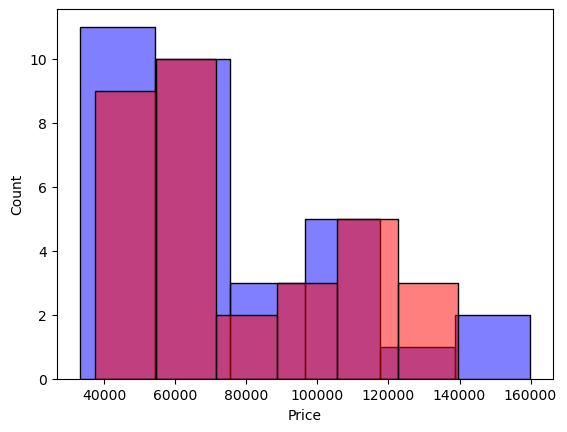

In [157]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred,color='red',alpha=0.5)
plt.show()

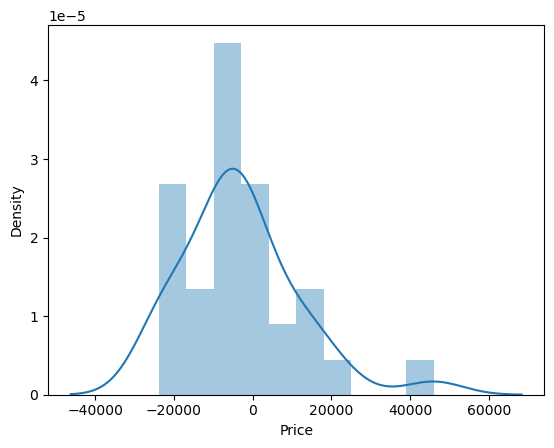

In [158]:

residual_test = y_test - y_pred

sns.distplot(residual_test)
plt.show()

In [159]:
# Lasso regression
from sklearn import linear_model
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lasso_reg=lassoReg.fit(x_train_processed, y_train)

In [160]:
lasso_reg=lassoReg.predict(x_test_processed)
lasso_reg

array([109815.36624399,  54435.20791525,  79065.99690283,  47925.1979544 ,
       112178.12349164,  47276.12279856,  45390.48696057, 132261.39041776,
        49096.58946752,  58776.35772439, 139570.97266052,  89466.27979727,
        98619.89594048,  57751.54951168,  95520.96581345, 111418.42144355,
        40790.10175093,  63369.83436673,  62784.89226036,  58074.09833611,
        62804.36798141,  71895.79977832,  61664.87598502,  37469.2220615 ,
        69959.8248221 ,  54654.35788525,  50808.61020751, 117138.33206681,
        63485.34265398,  37700.23863601, 128161.09294161, 114049.31715507])

In [161]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_reg})

temp_df

,Actual,Predicted
12,85990,109815.366244
3,49990,54435.207915
98,55600,79065.996903
6,39990,47925.197954
142,110990,112178.123492
122,62990,47276.122799
54,45900,45390.486961
78,109990,132261.390418
29,50990,49096.589468
134,55690,58776.357724


### Cross validation

In [162]:
df.head()

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4


In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [164]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [165]:
#  k-Fold using 10 variables

lm = LinearRegression()
scores = cross_val_score(lm, x_train_processed, y_train, scoring='r2', cv=5)
scores  

array([0.82693114, 0.85878598, 0.85027026, 0.89405994, 0.17350807])

In [166]:
#  the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train_processed, y_train, scoring='r2', cv=folds)
scores.mean()  

0.7889978230542396

In [167]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm,x_train_processed, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2.63614665e+08, -4.64601923e+08, -1.67119273e+08, -1.03632202e+08,
       -4.47035213e+08])

In [168]:
# number of features in X_train
len(x_train_processed.columns)

31

#####  step-1: create a cross-validation scheme

In [169]:
#
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_train_processed, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_processed, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [170]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036956,0.004302,0.001975,0.000052,1,{'n_features_to_select': 1},0.630452,0.394907,-0.073617,-0.035724,...,0.166911,0.292390,13,0.200062,0.360650,0.466939,0.436168,0.423641,0.377492,0.095224
1,0.034583,0.002320,0.001715,0.000625,2,{'n_features_to_select': 2},0.703886,0.663017,0.611332,0.572989,...,0.515996,0.247652,12,0.223241,0.750924,0.769927,0.768034,0.440989,0.590623,0.222118
2,0.031658,0.002461,0.001900,0.000488,3,{'n_features_to_select': 3},0.793455,0.663017,0.613272,0.572989,...,0.633915,0.091545,11,0.288538,0.750924,0.769758,0.768034,0.769112,0.669273,0.190497
3,0.033193,0.001863,0.002304,0.000369,4,{'n_features_to_select': 4},0.814531,0.632386,0.693073,0.583180,...,0.650003,0.098862,10,0.613068,0.780101,0.857225,0.779210,0.769112,0.759743,0.079872
4,0.032588,0.003224,0.001511,0.000448,5,{'n_features_to_select': 5},0.863915,0.705681,0.680996,0.659099,...,0.690701,0.102856,9,0.771336,0.784122,0.864605,0.801416,0.776140,0.799524,0.034111
5,0.032890,0.000806,0.001810,0.000729,6,{'n_features_to_select': 6},0.887043,0.696787,0.695420,0.720662,...,0.725214,0.086853,8,0.819604,0.827024,0.868739,0.824879,0.799247,0.827898,0.022661
6,0.030512,0.002188,0.001799,0.000499,7,{'n_features_to_select': 7},0.887043,0.748886,0.641287,0.837845,...,0.735375,0.120550,6,0.819604,0.875717,0.888667,0.880863,0.835414,0.860053,0.027351
7,0.028193,0.001085,0.002542,0.001230,8,{'n_features_to_select': 8},0.862934,0.778912,0.771633,0.839667,...,0.753136,0.125251,5,0.869913,0.896768,0.909353,0.890315,0.899200,0.893110,0.013116
8,0.027833,0.003221,0.002036,0.000638,9,{'n_features_to_select': 9},0.872241,0.777963,0.773970,0.808464,...,0.733951,0.152528,7,0.877771,0.907907,0.914097,0.901516,0.926997,0.905658,0.016288
9,0.026413,0.004080,0.001520,0.000456,10,{'n_features_to_select': 10},0.882889,0.797068,0.786196,0.894378,...,0.780685,0.126662,4,0.901463,0.926368,0.922086,0.918944,0.932477,0.920268,0.010440


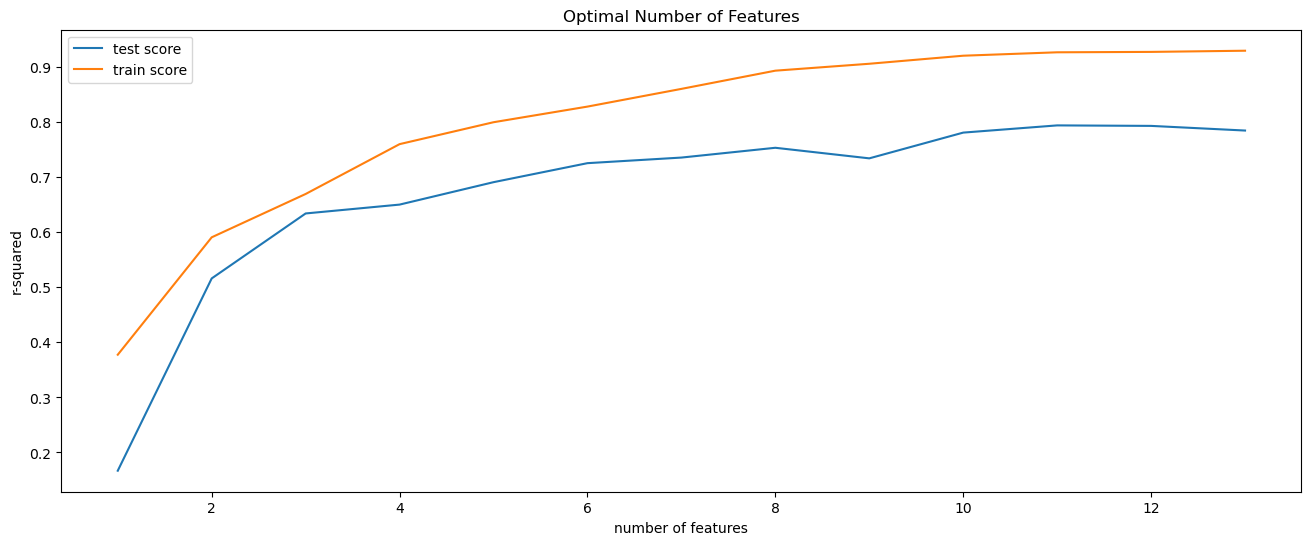

In [171]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [172]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Processor',order=cleaned_df['Processor'].value_counts().iloc[:5].index, y='MRP', data=cleaned_df)

NameError: name 'cleaned_df' is not defined

<Figure size 1500x500 with 0 Axes>

In [173]:
sns.pairplot(cleaned_df, hue='Brand')

NameError: name 'cleaned_df' is not defined

In [174]:
from sklearn.pipeline import Pipeline

In [175]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
151,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
152,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
153,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
154,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


In [176]:
from sklearn.compose import ColumnTransformer
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first'),[0,1,2,3,4,6,7]),
        ("sc", StandardScaler(),[5,8,9])
    ]
)

reg = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", LinearRegression())])



In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             156 non-null    object 
 1   Processor         156 non-null    object 
 2   RAM               156 non-null    object 
 3   RAM type          156 non-null    object 
 4   Storage           156 non-null    object 
 5   Display(inch)     156 non-null    float64
 6   Display_type      156 non-null    object 
 7   Operating_system  156 non-null    object 
 8   Warranty          156 non-null    int64  
 9   Price             156 non-null    int64  
 10  Rating            156 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 13.5+ KB


In [178]:
reg.fit(df , y)

NameError: name 'y' is not defined

In [672]:
df.head()

AttributeError: 'Pipeline' object has no attribute 'head'

#### DROPing nan model

In [179]:
import pickle
model_lr_nan = 'FInal_project_ml_reg.sav'
pickle.dump(reg , open(model_lr_nan , 'wb'))

In [180]:
nan_model_loading = pickle.load(open(r'C:\Users\manoj\INNO Machine learning\MACHINE LEARNING  projects\ML - Final Project\FInal_project_ml_reg.sav', 'rb'))

In [182]:
nan_model_loading

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 2, 3, 4, 6, 7]),
                                                 ('sc', StandardScaler(),
                                                  [5, 8, 9])])),
                ('regressor', LinearRegression())])

In [183]:
print(x_train_processed.shape)  # Check the shape of your training data
print(y_train.shape)  # Check the shape of your target labels


(124, 31)
(124,)


In [185]:
data

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
684,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
703,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
714,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
718,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


In [186]:
import pickle
final_df_reg_nan = 'df_nan.sav'

In [187]:
pickle.dump(df , open(final_df_reg_nan ,('wb')  ))

In [188]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
151,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
152,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
153,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
154,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


In [189]:
import pickle
model_lr = 'final_project_ML_reg.sav'
pickle.dump(reg , open(model_lr , 'wb'))

In [190]:
loaded_model = pickle.load(open(r'C:\Users\manoj\INNO Machine learning\MACHINE LEARNING  projects\ML - Final Project\final_project_ML_reg.sav', 'rb'))

In [191]:
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 2, 3, 4, 6, 7]),
                                                 ('sc', StandardScaler(),
                                                  [5, 8, 9])])),
                ('regressor', LinearRegression())])

In [192]:
print(x_train_processed.shape)  # Check the shape of your training data
print(y_train.shape)  # Check the shape of your target labels


(124, 31)
(124,)


In [193]:
data

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
684,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
703,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
714,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
718,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


In [194]:
import pickle
final_df_reg = 'df.sav'

In [195]:
pickle.dump(df , open(final_df_reg ,('wb')  ))

In [196]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
151,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
152,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
153,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
154,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


In [197]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.2
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.2
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.3
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.4
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.4
...,...,...,...,...,...,...,...,...,...,...,...
151,Lenovo,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,73990,4.0
152,Lenovo,Intel Core i7,16 GB,DDR4,1 TB SSD,16.0,No-Touch,Windows 11,3,157990,4.6
153,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.6
154,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.0


## Decission tree regressor

In [192]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_processed , y_train)

DecisionTreeRegressor()

In [193]:
dtr_pred = dtr.predict(x_test_processed)
dtr_pred

array([ 37023.33333333, 301990.        ,  33490.        , 157990.        ,
        60990.        ,  74990.        , 122490.        ,  77990.        ,
       331990.        , 110990.        ,  37023.33333333,  24990.        ,
        60390.        ,  30428.        ,  73990.        ,  30428.        ,
       124990.        ,  51145.        ,  70400.        ,  40190.        ,
       164990.        ,  37445.        ,  33490.        , 274990.        ,
        89990.        ,  58499.        ,  60740.        ,  80615.        ,
        38980.        ,  34490.        ,  76990.        ,  34990.        ,
        54990.        ,  60130.        ,  37023.33333333,  62990.        ,
        44990.        ,  40190.        ,  48077.        ,  50499.        ,
        89081.        , 190890.        ,  70990.        ,  37445.        ,
        60990.        ,  43990.        ,  55690.        , 114990.        ,
        63990.        , 274990.        ,  38990.        ,  99990.        ,
        69990.        ,  

In [194]:
dtr.fit(x_train_processed,y_train)
y_pred_lr=lr.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_lr))
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_lr))
Adj_score= 1-(1-r2_score(y_test,y_pred_lr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.8854037561451195
MAE: 14085.899061558734
MSE: 527930951.51983076
MAPE: 0.1544590529237894
Adj_r2_score : 0.8620600768413476


In [775]:
df

,Brand,Processor,RAM,RAM type,Storage,Display(inch),Display_type,Operating_system,Warranty,Price,Rating
0,Lenovo,Intel Core i3,8 GB,DDR4,256 GB SSD,14.0,No-Touch,Windows 11,2,36990,4.200000
1,Lenovo,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,2,39990,4.200000
2,ASUS,Intel Core i3,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,32990,4.300000
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,49990,4.400000
4,ASUS,Intel Core i5,8 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 11,1,49990,4.400000
...,...,...,...,...,...,...,...,...,...,...,...
399,DELL,Intel Core i5,16 GB,DDR5,512 GB SSD,15.6,No-Touch,Windows 11,1,76590,4.319861
400,HP,AMD Ryzen 7 Octa Core Processor,16 GB,DDR4,512 GB SSD,15.6,No-Touch,Windows 10,1,90000,4.600000
401,ASUS,Intel Core i5,4 GB,LPDDR4,512 GB SSD,11.6,Touch,Windows 11,1,23490,4.000000
402,ASUS,Intel Core i7,16 GB,DDR5,512 GB SSD,14.0,Touch,Windows 11,1,125990,3.000000
